
# SALES PREDICTION USING PYTHON



Learning is the only thing the
mind never exhausts, never
fears, and never regrets.  LEONARDO DA VINCI

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.



Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

https://www.kaggle.com/datasets/bumba5341/advertisingcsv

In [102]:
# import the libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [103]:
#load and read the head and tail 
data=pd.read_csv(r"Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 5)

there are 200 entries in 5 columns 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


There are 1 intiger column and 4 float columns

In [6]:
# rename the column unnamed 
data.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [8]:
data.describe()

,Index,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


From the description ther are no numll values in the dataset.
Newspaper data may have outliers. 


In [105]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Thereare no null values  present in  the dataset. 

# Univariate analysis

In [104]:
# copy the data 
df=data.copy()

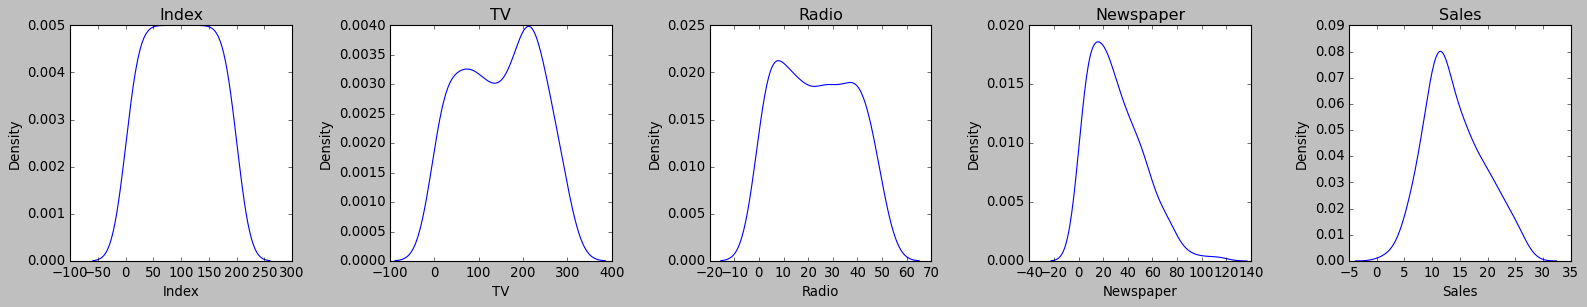

In [16]:
plt.style.use('classic')
plt.figure(figsize=(20,4))
re=1
for i in df.columns:
    plt.subplot(1,5,re)
    sns.kdeplot(x=df[i], color='blue')
    plt.title(i)
    re+=1
    
plt.tight_layout()
plt.show()

index column has a high density around 100. 
Tv column is multimodal
Radio is also mutlimodal. 
Newpaper is skewed. 


In [20]:
df['Index'].value_counts()[df['Index'].value_counts()>1]

Series([], Name: Index, dtype: int64)

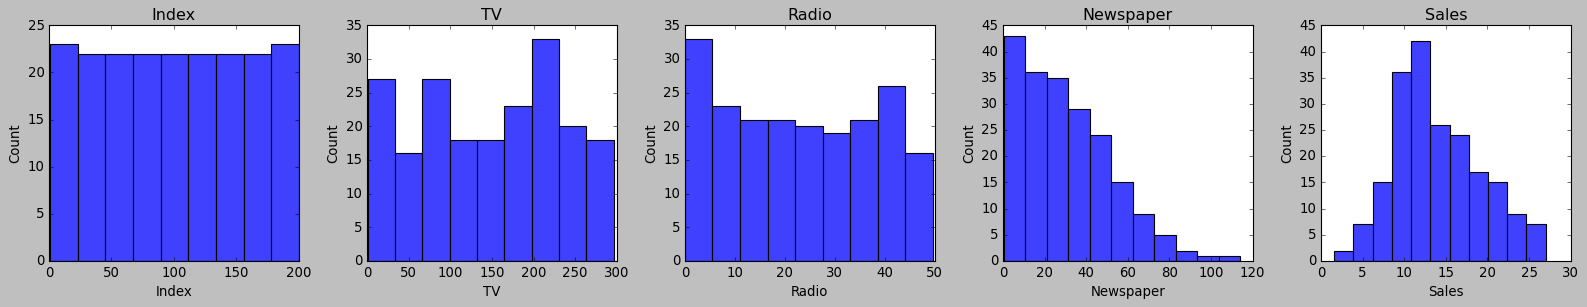

In [23]:
plt.style.use('classic')
plt.figure(figsize=(20,4))
re=1
for i in df.columns:
    plt.subplot(1,5,re)
    sns.histplot(x=df[i], color='blue')
    plt.title(i)
    re+=1
    
plt.tight_layout()
plt.show()

In [24]:
df.skew()

Index        0.000000
TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

No column is highly skewed. 

In [25]:
df.kurtosis()

Index       -1.200000
TV          -1.226495
Radio       -1.260401
Newspaper    0.649502
Sales       -0.408869
dtype: float64

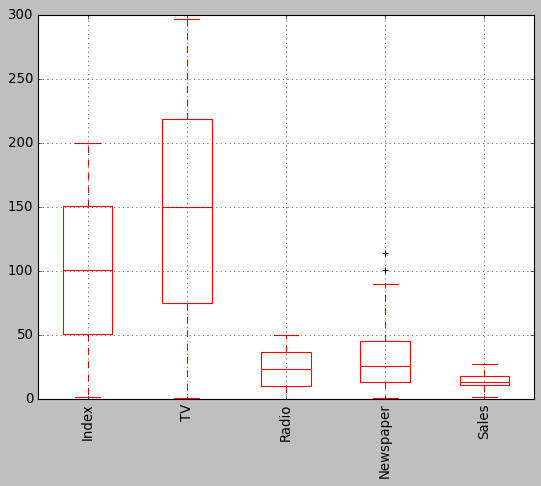

In [26]:
# checking for outliers 
plt.style.use('classic')
df.boxplot(color='red')
plt.xticks(rotation=90)
plt.show()

There are outliers in the newspaper column. 

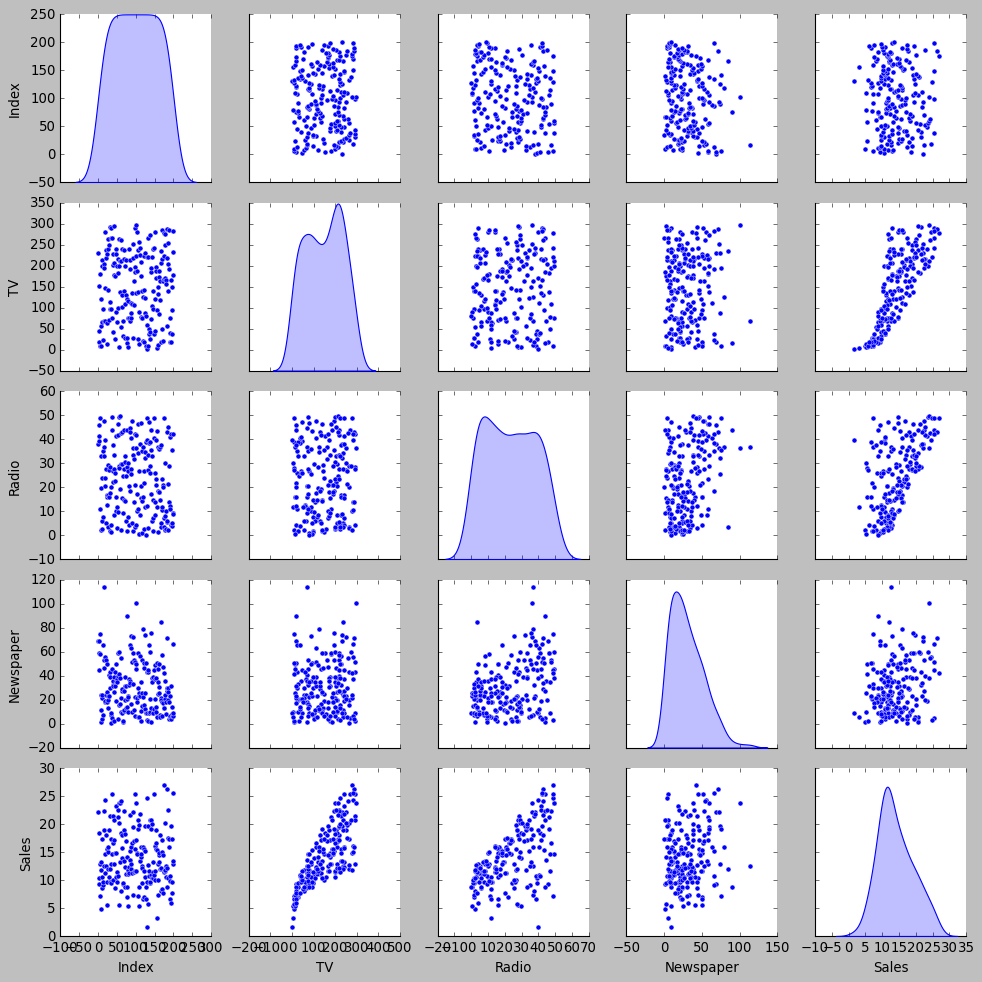

In [29]:
plt.style.use('classic')
sns.pairplot(df, diag_kind='kde')
plt.show()

Tv and sales has a linear relationship as the sales increases. 
There is a relationship between sales and radio 
No large multicorrelation from the pairplot

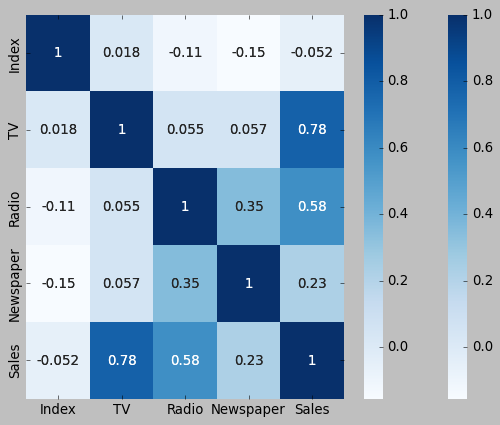

In [36]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

tv and radio is correlated with the sales. 
no other high correlation.

### STATISTICAL TESTS

Null Hypothesis (H0):
The null hypothesis of the Shapiro-Wilk test is that the population from which the sample is drawn follows a normal distribution.

Alternative Hypothesis (H1):
The alternative hypothesis is that the population from which the sample is drawn does not follow a normal distribution.

In [44]:
from scipy.stats import shapiro

shapiro_results = pd.DataFrame(columns=['Feature', 'W-statistic', 'P-value', 'Normal'])

# Loop through each numerical feature
for i in df.columns:
    # Perform Shapiro-Wilk test
    statistic, p_value = shapiro(df[i])

    # Check normality at a significance level (e.g., 0.05)
    normal = p_value > 0.05

    # Append results to the DataFrame
    shapiro_results = shapiro_results.append({
        'Feature': i,
        'W-statistic': statistic,
        'P-value': p_value,
        'Normal': normal
    }, ignore_index=True)

shapiro_results



,Feature,W-statistic,P-value,Normal
0,Index,0.954611,5.391695e-06,False
1,TV,0.949510,1.692741e-06,False
2,Radio,0.944005,5.196916e-07,False
3,Newspaper,0.936400,1.127221e-07,False
4,Sales,0.976026,1.682589e-03,False


No normally distributed cooumns exists.

### VIF

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = df.drop('Sales', axis=1).columns
vif_data["VIF"] = [variance_inflation_factor(df.drop('Sales', axis=1).values, i) for i in range(df.drop('Sales', axis=1).shape[1])]

# Display the VIF results
vif_data.sort_values(by='VIF', ascending=False)

,Feature,VIF
4,Intercept,10.888470
3,Newspaper,1.163551
2,Radio,1.149295
0,Index,1.029228
1,TV,1.005467


VIF < 2.5: Low or no multicollinearity.\
2.5 <= VIF < 5: Moderate multicollinearity.\
VIF >= 5: High multicollinearity.

No high multicollinearity exist.

# MODEL BUILDING

In [379]:
# import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer,StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut,GridSearchCV ,RandomizedSearchCV
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [380]:
# split the data 
from sklearn.model_selection import train_test_split

X=df.drop('Sales', axis=1)
y=df['Sales']

In [381]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=1, shuffle=True)

In [382]:
# scale the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [383]:
# fit the models together 
Regressors={'LR':LinearRegression(),
    'knnR':KNeighborsRegressor(),
              'decisiontreeR':DecisionTreeRegressor(),
              'randomforestR':RandomForestRegressor(),
              'gradientboostR':GradientBoostingRegressor(),
             "xgboostR":XGBRegressor()}

model_report=pd.DataFrame(columns=['model_name','r2 train','mse train','mse test']) #,#'roc'

for Regressor, Regressor_name in list(zip(Regressors.values(), Regressors.keys())):
    Regressor.fit(x_train,y_train)
    y_pred_train=Regressor.predict(x_train)
    y_pred_test=Regressor.predict(x_test)
    print('fitting the model ....',Regressor_name)
    t=pd.Series({
        'model_name':Regressor_name, 
        'r2 train':r2_score(y_train, y_pred_train),
        'mse train':mean_squared_error(y_train, y_pred_train),
        'mse test':mean_squared_error(y_test, y_pred_test)
    })
    model_report=model_report.append(t,ignore_index=True)
    

fitting the model .... LR
fitting the model .... knnR
fitting the model .... decisiontreeR
fitting the model .... randomforestR
fitting the model .... gradientboostR
fitting the model .... xgboostR


In [385]:
model_report

,model_name,r2 train,mse train,mse test
0,LR,0.895939,3.016774,1.989701
1,knnR,0.918737,2.355850,1.894750
2,decisiontreeR,1.000000,0.000000,0.760750
3,randomforestR,0.996467,0.102429,0.483092
4,gradientboostR,0.998884,0.032343,0.469098
5,xgboostR,1.000000,0.000002,0.505728


random forest regressor seems to be a the best among all other base models 

In [386]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

Best parameters for Ridge Regression:  {'alpha': 1} 



In [387]:
ridge_model = Ridge(alpha = 100, max_iter = 500)

# fit the model on train set
ridge_model.fit(x_train, y_train)


Ridge(alpha=100, max_iter=500)

In [388]:

ypred_train_ridge = ridge_model.predict(x_train)
ypred_test_ridge = ridge_model.predict(x_test)


In [389]:
model_report=model_report.append({'model_name':'Ridge', 
        'r2 train':r2_score(y_train, ypred_train_ridge),
        'mse train':mean_squared_error(y_train, ypred_train_ridge),
        'mse test':mean_squared_error(y_test, ypred_test_ridge)
    },ignore_index=True)

In [390]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')



Best parameters for Elastic Net Regression:  {'alpha': 0.01, 'l1_ratio': 0.2} 



In [391]:
elasticnet_model = ElasticNet(alpha = 5, l1_ratio=0.2, max_iter = 500)

In [392]:
elasticnet_model .fit(x_train, y_train)

ElasticNet(alpha=5, l1_ratio=0.2, max_iter=500)

In [393]:
ypred_train_ENET = elasticnet_model.predict(x_train)
ypred_test_ENET = elasticnet_model.predict(x_test)

In [394]:
model_report=model_report.append({'model_name':'ENET', 
        'r2 train':r2_score(y_train, ypred_train_ridge),
        'mse train':mean_squared_error(y_train, ypred_train_ridge),
        'mse test':mean_squared_error(y_test, ypred_test_ridge)
    },ignore_index=True)

In [395]:
model_report['mse diff']=model_report['mse train']-model_report['mse test']

In [396]:
model_report.sort_values(by='mse diff', ascending=True)

,model_name,r2 train,mse train,mse test,mse diff
2,decisiontreeR,1.000000,0.000000,0.760750,-0.760750
5,xgboostR,1.000000,0.000002,0.505728,-0.505727
4,gradientboostR,0.998884,0.032343,0.469098,-0.436755
3,randomforestR,0.996467,0.102429,0.483092,-0.380662
1,knnR,0.918737,2.355850,1.894750,0.461100
0,LR,0.895939,3.016774,1.989701,1.027073
6,Ridge,0.776040,6.492714,4.636091,1.856623
7,ENET,0.776040,6.492714,4.636091,1.856623


### Tuning Random Forest Regressor 

In [397]:
from sklearn.model_selection import train_test_split

X=df.drop('Sales', axis=1)
y=df['Sales']

In [398]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=100, shuffle=True)

In [399]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [400]:
rf=RandomForestRegressor()

In [401]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [402]:
y_pred_test=rf.predict(x_test)
y_pred_train=rf.predict(x_train)

In [403]:
print('r2 train',r2_score(y_train, y_pred_train),'\n',
'mse train',mean_squared_error(y_train, y_pred_train),'\n',
'mse test',mean_squared_error(y_test, y_pred_test))

r2 train 0.9961613528515942 
 mse train 0.10861115624999973 
 mse test 0.3399525749999995


In [404]:
param_grid = {
    'n_estimators': [25,50,75,100, 200],
    'max_depth': [None, 10, 20,7,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,5]
}



grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [405]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [406]:
rf=RandomForestRegressor(**grid_search.best_params_)

In [407]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=7)

In [409]:
y_pred_test=rf.predict(x_test)
y_pred_train=rf.predict(x_train)

print('r2 train',r2_score(y_train, y_pred_train),'\n',
'mse train',mean_squared_error(y_train, y_pred_train),'\n',
'mse test',mean_squared_error(y_test, y_pred_test))

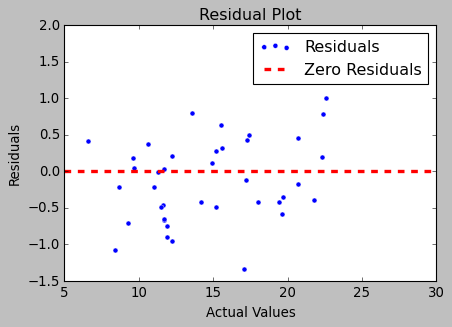

In [411]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=(y_test - y_pred_test), color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=3, label='Zero Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

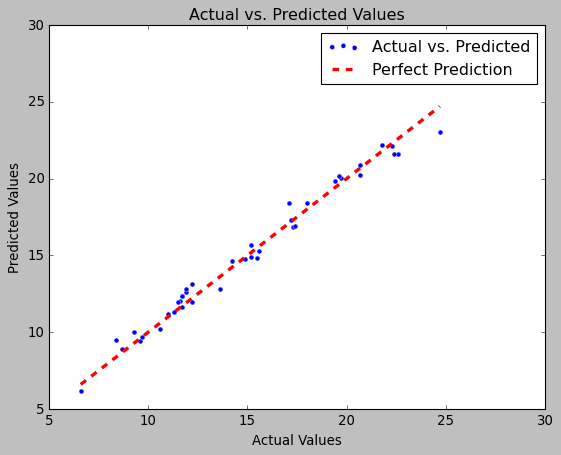

In [412]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test,
            y=y_pred_test, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=3, 
         label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

The random forest model performs good. 

#### thank you